In [3]:
import pandas as pd
import numpy as np
from tabulate import tabulate
df=pd.read_excel("D:\khaleef 2\HR analytics lab\Ex4.xlsx",sheet_name="Cost & Productivity")
df.head(5)

,Cost involved in recruiting,Number of hires,Induction program cost,New hires performance satisfaction,Performance Differential,Time to fill(days),Sourcing Channel,Industry
0,"$10,000",10,"$2,000",0.90,0.05,30,Job board,Printing
1,"$5,000",5,"$1,000",0.85,0.03,45,Employee referral,Printing
2,"$3,000",2,$500,0.75,0.02,60,Recruitment agency,Printing
3,"$4,000",3,$750,0.80,0.04,40,Social media,Printing
4,"$6,000",4,"$1,500",0.87,0.06,35,Employee networking,Printing


In [5]:
time_to_fill_by_sourcing_channel = df.groupby('Sourcing Channel')['Time to fill(days)'].mean()
performance_satisfaction_by_sourcing_channel = df.groupby('Sourcing Channel')['New hires performance satisfaction'].mean()
print(time_to_fill_by_sourcing_channel)
print(performance_satisfaction_by_sourcing_channel)

Sourcing Channel
Employee networking    35.0
Employee referral      45.0
Job board              30.0
Recruitment agency     60.0
Social media           40.0
Name: Time to fill(days), dtype: float64
Sourcing Channel
Employee networking    0.87
Employee referral      0.85
Job board              0.90
Recruitment agency     0.75
Social media           0.80
Name: New hires performance satisfaction, dtype: float64


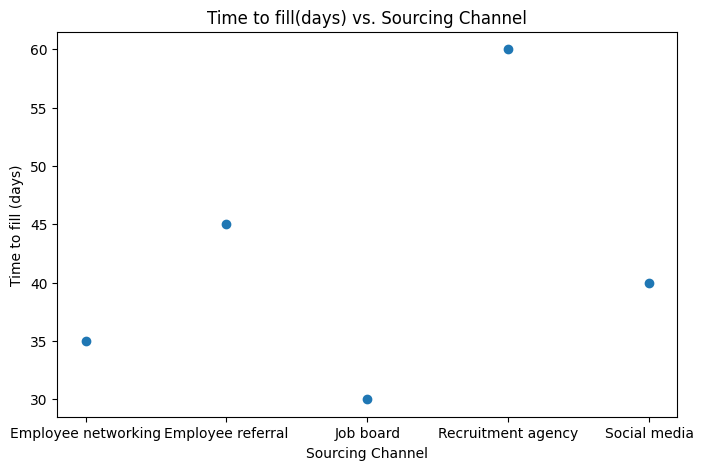

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(time_to_fill_by_sourcing_channel.index, time_to_fill_by_sourcing_channel.values)
plt.xlabel('Sourcing Channel')
plt.ylabel('Time to fill (days)')
plt.title('Time to fill(days) vs. Sourcing Channel')
plt.show()

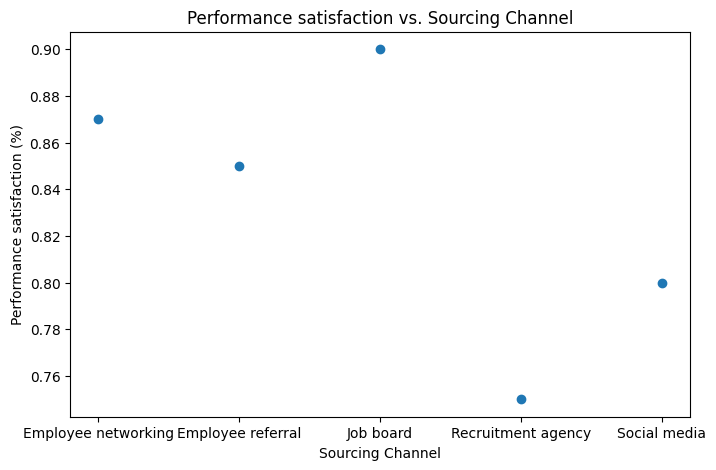

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(performance_satisfaction_by_sourcing_channel.index, performance_satisfaction_by_sourcing_channel.values)
plt.xlabel('Sourcing Channel')
plt.ylabel('Performance satisfaction (%)')
plt.title('Performance satisfaction vs. Sourcing Channel')
plt.show()

In [9]:
#the correlation coefficient between time to fill and sourcing channel, and between performance satisfaction and sourcing channel:
correlation_time_to_fill_sourcing_channel = np.corrcoef(time_to_fill_by_sourcing_channel.values, df['Sourcing Channel'].astype('category').cat.codes)[0, 1]
correlation_performance_satisfaction_sourcing_channel = np.corrcoef(performance_satisfaction_by_sourcing_channel.values, df['Sourcing Channel'].astype('category').cat.codes)[0, 1]
print(correlation_time_to_fill_sourcing_channel)
print(correlation_performance_satisfaction_sourcing_channel)

0.3434014098717226
-0.13306157385308748


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_excel("D:\khaleef 2\HR analytics lab\Ex4.xlsx", sheet_name="Cost & Productivity")

# Encode the sourcing channel as a numerical variable
encoded_sourcing_channel = pd.get_dummies(df['Sourcing Channel'].astype('category'))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_sourcing_channel, df['Time to fill(days)'], test_size=0.25)

In [15]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model's performance on the test set
y_pred = model.predict(X_test)
r2_score = model.score(X_test, y_test)

# Print the R-squared score
print(r2_score)

-40.11111111111112


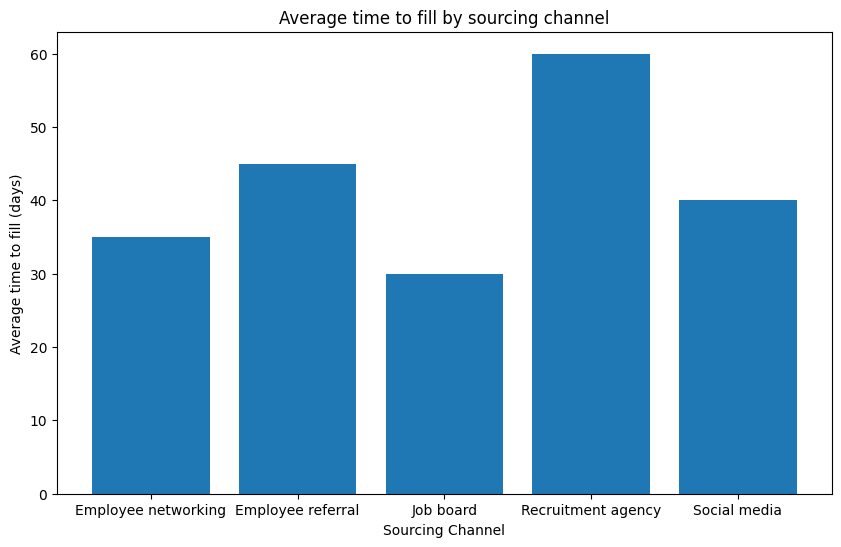

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_excel("D:\khaleef 2\HR analytics lab\Ex4.xlsx", sheet_name="Cost & Productivity")

# Calculate the average time to fill for each sourcing channel
avg_time_to_fill_by_sourcing_channel = df.groupby('Sourcing Channel')['Time to fill(days)'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_time_to_fill_by_sourcing_channel.index, avg_time_to_fill_by_sourcing_channel.values)
plt.xlabel('Sourcing Channel')
plt.ylabel('Average time to fill (days)')
plt.title('Average time to fill by sourcing channel')
plt.show()